In [2]:
from fafbseg import flywire
import flybrains
import pandas as pd
import navis
import matplotlib.pyplot as plt

/usr/local/anaconda3/lib/python3.11/site-packages/python_jsonschema_objects/__init__.py:113: UserWarning: Schema id not specified. Defaulting to 'self'
  warnings.warn("Schema id not specified. Defaulting to 'self'")


In [3]:
annotations = pd.read_csv("~/Downloads/Supplemental_file1_neuron_annotations.tsv", sep="\t")

/var/folders/tr/kg4khbbd46z9nss0bjtp8g3w0000gn/T/ipykernel_2742/3170654268.py:1: DtypeWarning: Columns (14,15,16,17,21) have mixed types. Specify dtype option on import or set low_memory=False.
  annotations = pd.read_csv("~/Downloads/Supplemental_file1_neuron_annotations.tsv", sep="\t")


In [4]:
annotations.loc[annotations["hemibrain_type"] == "SAD012"].head(20)

supervoxel_id             root_id   pos_x  pos_y  pos_z    soma_x  \
19214  76634586402243980  720575940617688389   87638  50829   2728   84880.0   
24885  82475535632025533  720575940615160844  172374  56262   1593  175840.0   
29057  76423480169751601  720575940634505071   84224  51488   2751   84224.0   
34009  82897610658389974  720575940617596884  178376  54616   1777  178376.0   

        soma_y  soma_z  nucleus_id       flow  ... ito_lee_hemilineage  \
19214  48328.0  2755.0   1809043.0  intrinsic  ...        VLPl2_medial   
24885  55856.0  1537.0   7391384.0  intrinsic  ...        VLPl2_medial   
29057  51488.0  2751.0   1844643.0  intrinsic  ...        VLPl2_medial   
34009  54616.0  1777.0   7393881.0  intrinsic  ...        VLPl2_medial   

      hartenstein_hemilineage morphology_group         top_nt top_nt_conf  \
19214            BLAv2_medial              NaN  acetylcholine    0.740309   
24885            BLAv2_medial              NaN  acetylcholine    0.672817   
29057            BLAv2_medial              NaN  acetylcholine    0.840079   
34009            BLAv2_medial              NaN  acetylcholine    0.826147   

        side nerve    vfb_id        fbbt_id  status  
19214   left   NaN  fw019471  FBbt_20002221     NaN  
24885  right   NaN  fw025140  FBbt_20002221     NaN  
29057   left   NaN  fw029287  FBbt_20002221     NaN  
34009  right   NaN  fw034191  FBbt_20002221     NaN  

[4 rows x 25 columns]

In [5]:
id = 720575940615160844

In [6]:
downstream_syn = flywire.get_synapses(id, post=False, min_score=50)
upstream_syn = flywire.get_synapses(id, pre=False, min_score=50)

Using materialization version 630.
Using materialization version 630.


In [7]:
downstream_syn.value_counts("post")
upstream_syn.value_counts("pre")

pre
720575940638722138    13
720575940627975017     7
720575940616674265     7
720575940613997499     7
720575940611720690     6
                      ..
720575940616768699     1
720575940615359538     1
720575940615222023     1
720575940614981062     1
720575940658655873     1
Name: count, Length: 97, dtype: int64

In [23]:
# top three downstream neuron IDs
down_3 = downstream_syn.value_counts("post").index[:3].to_list()
up_3 = upstream_syn.value_counts("pre").index[:3].to_list()

In [9]:
skel = flywire.get_skeletons(id)
flywire.get_synapses(skel, attach=True)

Using materialization version 630.


pre                post  cleft_score   pre_x   pre_y  \
0     720575940628478823  720575940615160844          142  473120  181040   
1     720575940615612822  720575940615160844          136  478356  204440   
2     720575940627975017  720575940615160844          122  606224  276232   
3     720575940617596884  720575940615160844           67  441284  189996   
4     720575940611217650  720575940615160844          157  606952  275624   
...                  ...                 ...          ...     ...     ...   
1146  720575940615160844  720575940431913316          155  450424  187160   
1147  720575940615160844  720575940606621122          148  450088  183024   
1148  720575940615160844  720575940413011848          148  445180  195872   
1149  720575940615160844  720575940573731528           71  451904  197168   
1150  720575940615160844  720575940620321217          148  426372  189568   

       pre_z  post_x  post_y  post_z         id  
0     168480  473104  181156  168440    5812240  
1     173880  478444  204376  173920  113771438  
2     124880  606300  276328  124920   76403280  
3     183080  441144  189920  183080  155468034  
4     125160  606920  275764  125160   76403326  
...      ...     ...     ...     ...        ...  
1146  176800  450544  187212  176800   22498340  
1147  172960  450140  183120  172960  229649951  
1148  173000  445204  195984  172920  229284396  
1149  181560  451968  197120  181520  155701930  
1150  172520  426408  189704  172480  229059372  

[1151 rows x 10 columns]

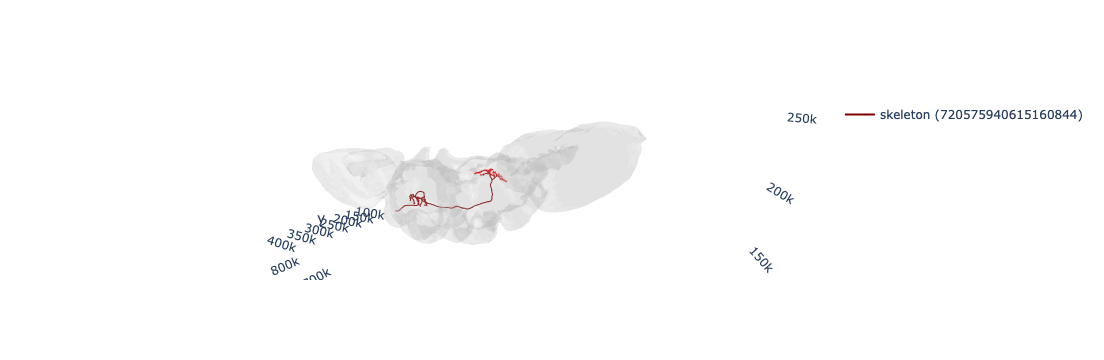

In [12]:
fig = navis.plot3d([skel,flybrains.FLYWIRE], connectors=True, color=(.5,0,0), cn_colors={"pre":(1,0,0), "post":(1,.5,.5)}, scatter_kws={"size":10})
plt.show()

In [27]:
flywire.encode_url(segments=[id]+down_3+up_3, dataset="public", seg_groups=[0,1,1,1,2,2,2], seg_colors=["red","blue","blue","blue","green","green","green"])

'https://ngl.flywire.ai/?json_url=https://globalv1.flywire-daf.com/nglstate/5651244439830528'